In [1]:
import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, Subset

In [2]:
from NNDL import *

## Load data

In [3]:
training_data = datasets.MNIST(root="data", train=True, transform=ToTensor(), download=True)
test_data = datasets.MNIST(root="data", train=False, transform=ToTensor())

## Visualization of dataset

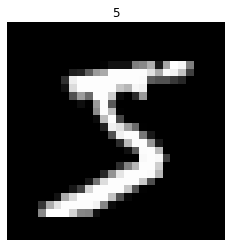

In [4]:
display_image(training_data.data[0], training_data.targets[0])

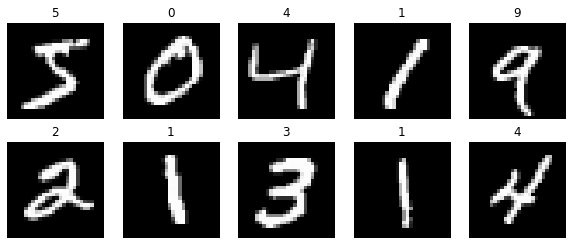

In [5]:
display_images(training_data.data[0:10], training_data.targets[0:10], 2, 5)

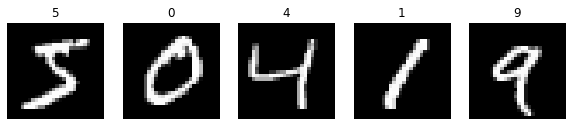

In [6]:
# Display part of the dataset
images_and_labels = list(zip(*[training_data[i] for i in range(5)]))
display_images(images_and_labels[0], images_and_labels[1], 1, 5)

## Train

In [7]:
import torch.nn as nn

In [8]:
net = Network1([784, 100, 10])
net

Network1(
  (layer0): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (layer1): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): Sigmoid()
  )
)

In [9]:
# loss_fn = nn.MSELoss(reduction="mean")
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [10]:
net.SGD(training_data, 30, 10, 5, loss_fn, test_data)

Epoch [1/30], loss: 1.54593, training_accuracy: 0.90607, evaluation 9460 / 10000, evaluation accuracy: 0.94600
Epoch [2/30], loss: 1.50280, training_accuracy: 0.95535, evaluation 9574 / 10000, evaluation accuracy: 0.95740
Epoch [3/30], loss: 1.49343, training_accuracy: 0.96533, evaluation 9640 / 10000, evaluation accuracy: 0.96400
Epoch [4/30], loss: 1.48881, training_accuracy: 0.97053, evaluation 9668 / 10000, evaluation accuracy: 0.96680
Epoch [5/30], loss: 1.48526, training_accuracy: 0.97400, evaluation 9698 / 10000, evaluation accuracy: 0.96980
Epoch [6/30], loss: 1.48304, training_accuracy: 0.97633, evaluation 9720 / 10000, evaluation accuracy: 0.97200
Epoch [7/30], loss: 1.48201, training_accuracy: 0.97760, evaluation 9713 / 10000, evaluation accuracy: 0.97130
Epoch [8/30], loss: 1.48037, training_accuracy: 0.97982, evaluation 9671 / 10000, evaluation accuracy: 0.96710
Epoch [9/30], loss: 1.47867, training_accuracy: 0.98122, evaluation 9698 / 10000, evaluation accuracy: 0.96980
E

## Evaluate

In [ ]:
test_data_subset = Subset(test_data, range(20))
eval_data_loader = DataLoader(test_data_subset, batch_size=len(test_data_subset), shuffle=False, num_workers=0)

In [ ]:
sample = next(iter(eval_data_loader))
images, labels = sample

In [ ]:
test_output = net(images)

In [ ]:
actual_number = labels.numpy()
actual_number

In [ ]:
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction: {pred_y}')
print(f'Actual    : {actual_number}')

In [11]:
test_data_loader = DataLoader(test_data, batch_size=1, shuffle=False, num_workers=0)
net.eval()

wrong_images = []
correct_labels = []
output_labels = []

with torch.no_grad():
    total_correct = 0
    total_count = 0
    for i, (images, labels) in enumerate(test_data_loader):
        test_output = net(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        correct = (pred_y == labels).sum().item()
        
        if correct != 1:
#             print(i)
            wrong_images.append(test_data.data[i])
            correct_labels.append(test_data.targets[i].item())
            output_labels.append(pred_y.item())
#             print()
#             print()
            
        count = len(labels)
        total_correct += correct
        total_count += count
        
#         if i >= 100:
#             break;

In [12]:
len(correct_labels)

264

In [13]:
len(output_labels)

264

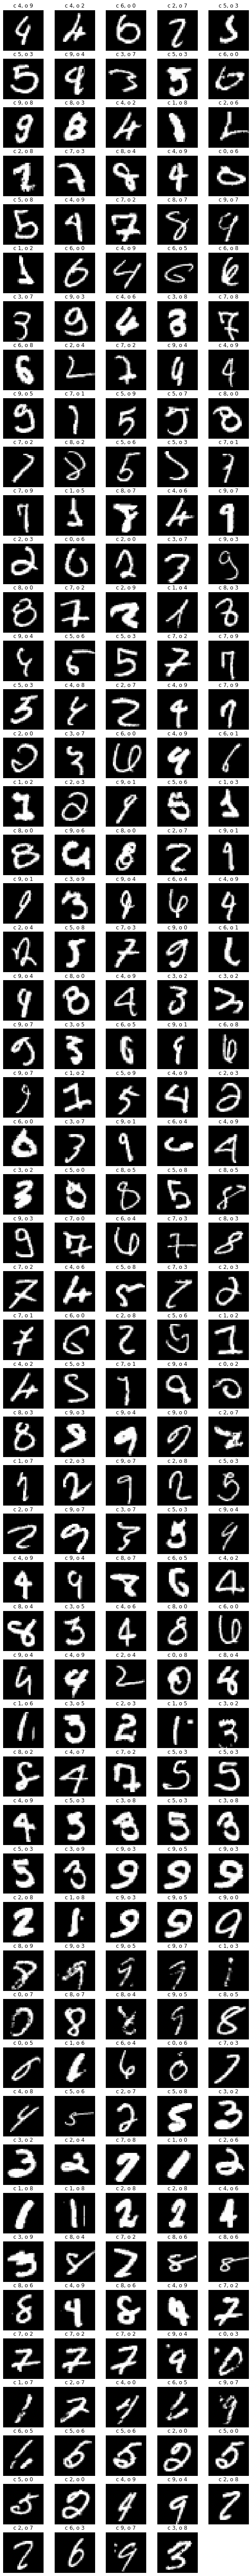

In [14]:
display_images(wrong_images[:], correct_labels[:], 60, 5, output_labels=output_labels[:])